# Check pack_padded_sequence

In [2]:
from torch.nn.utils.rnn import pack_padded_sequence
import torch

## caption 为 [batch, seq_max_len] 时

In [14]:
# 三个句子，最长的句子为5个单词，第二4个，第三2个单词
captions = torch.rand((3, 5))  # [batch, seq_len]
lengths = [5, 4, 2]  # [batch, ]

In [15]:
captions

tensor([[0.6093, 0.6567, 0.3047, 0.7968, 0.1356],
        [0.3709, 0.5245, 0.7789, 0.3719, 0.0903],
        [0.0688, 0.5142, 0.8687, 0.6641, 0.5481]])

In [17]:
pack_padded_sequence(captions, lengths, batch_first=True)

PackedSequence(data=tensor([0.6093, 0.3709, 0.0688, 0.6567, 0.5245, 0.5142, 0.3047, 0.7789, 0.7968,
        0.3719, 0.1356]), batch_sizes=tensor([3, 3, 2, 2, 1]))


pack_padded_sequence要求输入的batch内部有序（seq按其长度降序排列）,只会取有效的数据pack起来，这样的操作是为了满足RNN/LSTM的输入  
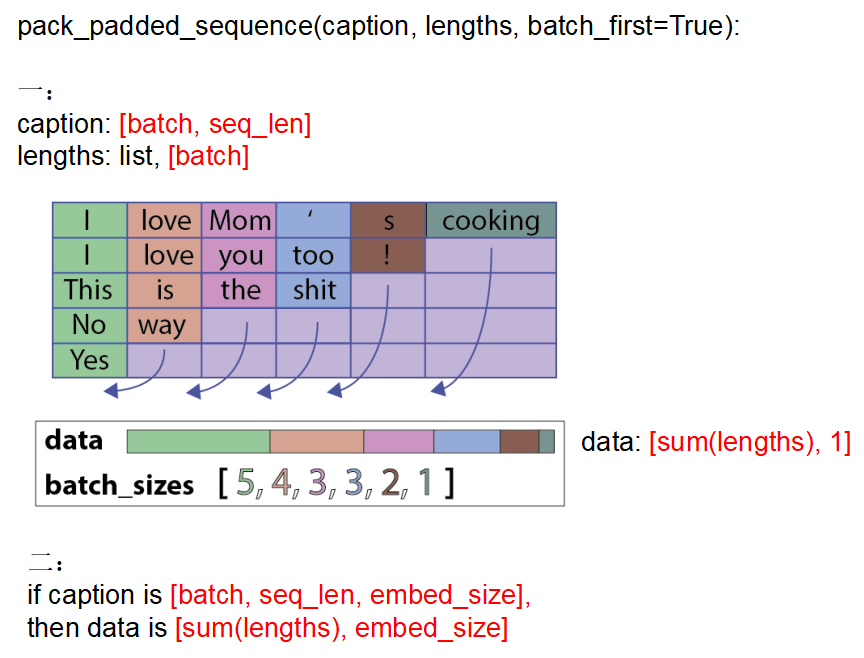

## Caption 为 [batch, seq_max_len, embed_size] 时
其实结果是一样的，只是多了一维看上去复杂了而已
下面直接模拟 Tutorial 中的 Decoder 的部分过程。

In [22]:
img = torch.rand((3, 1, 4))           # [batch, 1, embed_size]
captions = torch.rand((3, 5, 4))      # [batch,  seq_max_len, embed_size]
lengths = [5, 4, 2]                   # [batch, ]

In [28]:
print(img)
print(captions)

tensor([[[0.0863, 0.6725, 0.2125, 0.9455]],

        [[0.3236, 0.0746, 0.2263, 0.3769]],

        [[0.4036, 0.0592, 0.3895, 0.8397]]])
tensor([[[0.7280, 0.0329, 0.7524, 0.7847],
         [0.5548, 0.8458, 0.6505, 0.3370],
         [0.0910, 0.0679, 0.1245, 0.5818],
         [0.4334, 0.2302, 0.4861, 0.1436],
         [0.7159, 0.4245, 0.5619, 0.7665]],

        [[0.6830, 0.7089, 0.0426, 0.3029],
         [0.5818, 0.0588, 0.0910, 0.2126],
         [0.5615, 0.4820, 0.9632, 0.2564],
         [0.1500, 0.8427, 0.1171, 0.5005],
         [0.6060, 0.7696, 0.1567, 0.0645]],

        [[0.0282, 0.8368, 0.0803, 0.7387],
         [0.3027, 0.7960, 0.8689, 0.0569],
         [0.0846, 0.3790, 0.1141, 0.5133],
         [0.3018, 0.4275, 0.0155, 0.2016],
         [0.4187, 0.5686, 0.3213, 0.6749]]])


In [32]:
cat = torch.cat((img, captions), 1) 
cat

tensor([[[0.0863, 0.6725, 0.2125, 0.9455],
         [0.7280, 0.0329, 0.7524, 0.7847],
         [0.5548, 0.8458, 0.6505, 0.3370],
         [0.0910, 0.0679, 0.1245, 0.5818],
         [0.4334, 0.2302, 0.4861, 0.1436],
         [0.7159, 0.4245, 0.5619, 0.7665]],

        [[0.3236, 0.0746, 0.2263, 0.3769],
         [0.6830, 0.7089, 0.0426, 0.3029],
         [0.5818, 0.0588, 0.0910, 0.2126],
         [0.5615, 0.4820, 0.9632, 0.2564],
         [0.1500, 0.8427, 0.1171, 0.5005],
         [0.6060, 0.7696, 0.1567, 0.0645]],

        [[0.4036, 0.0592, 0.3895, 0.8397],
         [0.0282, 0.8368, 0.0803, 0.7387],
         [0.3027, 0.7960, 0.8689, 0.0569],
         [0.0846, 0.3790, 0.1141, 0.5133],
         [0.3018, 0.4275, 0.0155, 0.2016],
         [0.4187, 0.5686, 0.3213, 0.6749]]])

In [31]:
pack_padded_sequence(cat, lengths, batch_first=True)

PackedSequence(data=tensor([[0.0863, 0.6725, 0.2125, 0.9455],
        [0.3236, 0.0746, 0.2263, 0.3769],
        [0.4036, 0.0592, 0.3895, 0.8397],
        [0.7280, 0.0329, 0.7524, 0.7847],
        [0.6830, 0.7089, 0.0426, 0.3029],
        [0.0282, 0.8368, 0.0803, 0.7387],
        [0.5548, 0.8458, 0.6505, 0.3370],
        [0.5818, 0.0588, 0.0910, 0.2126],
        [0.0910, 0.0679, 0.1245, 0.5818],
        [0.5615, 0.4820, 0.9632, 0.2564],
        [0.4334, 0.2302, 0.4861, 0.1436]]), batch_sizes=tensor([3, 3, 2, 2, 1]))